## ***Car_Price_Analysis***

### ***Objective***

Analyzing Price Disparities and Trends in the Indian Automotive Market: A Comparative Study Across Coimbatore, Kolkata, and Jaipur

Analysis Goals:
- Descriptive Analysis: Summarize the dataset to understand the distribution of key features such as year of manufacture, kilometers driven, fuel type, transmission type, owner type, and seating capacity.
- Price Analysis: Investigate factors influencing the resale price of cars. Examine relationships between price and features like year, kilometers driven, fuel type, engine capacity, and power.
- Geographical Insights: Explore how car sales and prices vary across locations. Identify cities with higher or lower average resale prices.
- Trend Analysis: Analyze how car prices have evolved over time and assess the impact of manufacturing year on resale value.
- Missing Data Handling: Address missing values in critical columns such as Mileage, Engine, Power, Seats, New_Price, and Price. Apply appropriate imputation techniques like mean, median, mode, or predictive modeling.
- Correlation Analysis: Perform correlation analysis to determine the strength and direction of relationships between numerical features and resale price.


#### **Import Python Libraries**
The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### **Reading Dataset**
The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [2]:
df = pd.read_csv(r"C:\Users\Pratiksha\OneDrive\Desktop\Ml model building\EDA\Car.csv").drop(columns=['S.No.'],axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Analyzing the Data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.



head() will display the top 5 observations of the dataset

In [3]:
df.shape

(7253, 13)

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 7253 observations and 13 variables in our dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


info() helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

### **Data Preprocessing**

In [5]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [6]:
df.duplicated().sum()

np.int64(1)

### **Data Handling**

In [7]:
# Handling The Mileage Column to split the values into two columns as Mileage(kmpl) and Unit
# Data Type Convertio to int

df[['Mileage(kmpl)', 'Unit']] = df['Mileage'].str.split(' ', expand=True)
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)


In [8]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage(kmpl),Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


In [9]:
# Fuction for unit conversion
# Summary:
# multiply km/kg by ~1.33

def unit_conversion(mileage,unit):
    if unit == 'km/kg':
        return mileage *1.4
    else:
        return mileage

df['Mileage(kmpl)'] = df.apply(lambda x: unit_conversion(x['Mileage(kmpl)'], x['Unit']), axis=1)

In [10]:
df['Mileage(kmpl)']

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage(kmpl), Length: 7253, dtype: float64

In [11]:
# Handling Engine Column to split the values into two columns as Engine(CC) and Unit
# Replace null values with None
# Data Type Convertio to int
df[['Engine(CC)', 'Unit']] = df['Engine'].str.split(' ', expand=True)
df['Engine(CC)'].replace({'null':None}, inplace=True)
df['Engine(CC)'].fillna(0, inplace=True)
df['Engine(CC)'] = df['Engine(CC)'].astype('int')

In [12]:
# Handling Power Column to split the values into two columns as Power(bhp) and Unit
# Replace null values with '0'
# Data Type Convertio to int
df[['Power(bhp)', 'Unit']] = df['Power'].str.split(' ', expand=True)
df['Power(bhp)'].replace({'null':'0'}, inplace=True)
df['Power(bhp)'].fillna(0, inplace=True)
df['Power(bhp)'] = df['Power(bhp)'].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
 13  Mileage(kmpl)      7251 non-null   float64
 14  Unit               7207 non-null   object 
 15  Engine(CC)         7253 non-null   int64  
 16  Power(bhp)         7253 

In [14]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
Mileage(kmpl)           2
Unit                   46
Engine(CC)              0
Power(bhp)              0
dtype: int64

In [15]:
# Handling the Price column by replacing null values with the mean of the column

df['Price'].fillna(df['Price'].mean(),inplace=True)

In [16]:
# Handling the Seats column by replacing null values with the median of the column

df['Seats'].fillna(df['Seats'].median(),inplace=True)

In [17]:
# Handling the kmpl column by replacing null values with the mean of the column

df['Mileage(kmpl)'].fillna(df['Mileage(kmpl)'].mean(),inplace=True)

### **Data Reduction**
Some columns or variables can be dropped if they do not add value to our analysis.



In [18]:

df.drop(columns=['New_Price','Mileage','Power','Engine','Unit'],axis=1,inplace=True)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

We start our Feature Engineering as we need to add some columns required for analysis.



### **Feature Engineering**

In [21]:
df['Brand'] = df['Name'].str.split().str.get(0)
df['Model'] = df['Name'].str.split().str.get(1) +''+df['Name'].str.split().str.get(2)

In [22]:
df[['Brand','Model']]

,Brand,Model
0,Maruti,WagonR
1,Hyundai,Creta1.6
2,Honda,JazzV
3,Maruti,ErtigaVDI
4,Audi,A4New
...,...,...
7248,Volkswagen,VentoDiesel
7249,Volkswagen,PoloGT
7250,Nissan,MicraDiesel
7251,Volkswagen,PoloGT


In [23]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [24]:
len(df['Model'].unique())

727

In [25]:
df['Brand'].replace({'Land':'Land Rover','Mini':'Mini Cooper','Isuzu':'ISUZU'},inplace=True)

In [26]:
df['Model']=df['Model'].str.lower()

In [27]:
from  datetime import date
today = date.today()
today.year


2025


We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.

It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price.

Introducing a new column, “Car_Age” to know the age of the car

In [28]:
df['Car_Age'] =today.year -df['Year']

In [29]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp),Brand,Model,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,37.24,998,58.16,Maruti,wagonr,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.20,Hyundai,creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199,88.70,Honda,jazzv,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76,Maruti,ertigavdi,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968,140.80,Audi,a4new,12


We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process

 Our Data is ready to perform EDA.

EDA Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.
EDA helps to find meaningful patterns in data.
EDA provides in-depth insights into the data sets to solve our business problems.
EDA gives a clue to impute missing values in the dataset
Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.00,2014.00,2016.000000,2019.000
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.00,53429.00,73000.000000,6500000.000
Seats,7252.0,5.277716,0.809088,0.00,5.00,5.00,5.000000,10.000
Price,7252.0,9.479468,10.192398,0.44,3.85,6.75,9.479468,160.000
Mileage(kmpl),7252.0,18.241157,4.839563,0.00,15.26,18.20,21.100000,46.956
Engine(CC),7252.0,1606.335907,607.154934,0.00,1197.00,1462.00,1968.000000,5998.000
Power(bhp),7252.0,110.043324,55.609120,0.00,74.00,91.10,138.030000,616.000
Car_Age,7252.0,11.634170,3.254405,6.00,9.00,11.00,14.000000,29.000


In [31]:
df.describe(include='object').T

,count,unique,top,freq
Name,7252,2041,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,948
Fuel_Type,7252,5,Diesel,3852
Transmission,7252,2,Manual,5203
Owner_Type,7252,4,First,5951
Brand,7252,32,Maruti,1444
Model,7251,705,swiftdzire,189


from the statistics summary, we can infer the below findings :

- Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.

- On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.

- Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.

- It looks like Engine and Power have outliers, and the data is right-skewed.

- The average number of seats in a car is 5. car seat is an important feature in price contribution.

- The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

- describe(include=’all’) provides a statistics summary of all data, include object, category etc

### **Data Visualization**

In [32]:
numerical = df.select_dtypes(include=['int','float']).columns
categorical =df.select_dtypes(include=['int','float']).columns 
print(numerical)
print(categorical) 

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age'],
      dtype='object')
Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age'],
      dtype='object')


### **EDA Univariate Analysis**
Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

<Figure size 1000x800 with 0 Axes>

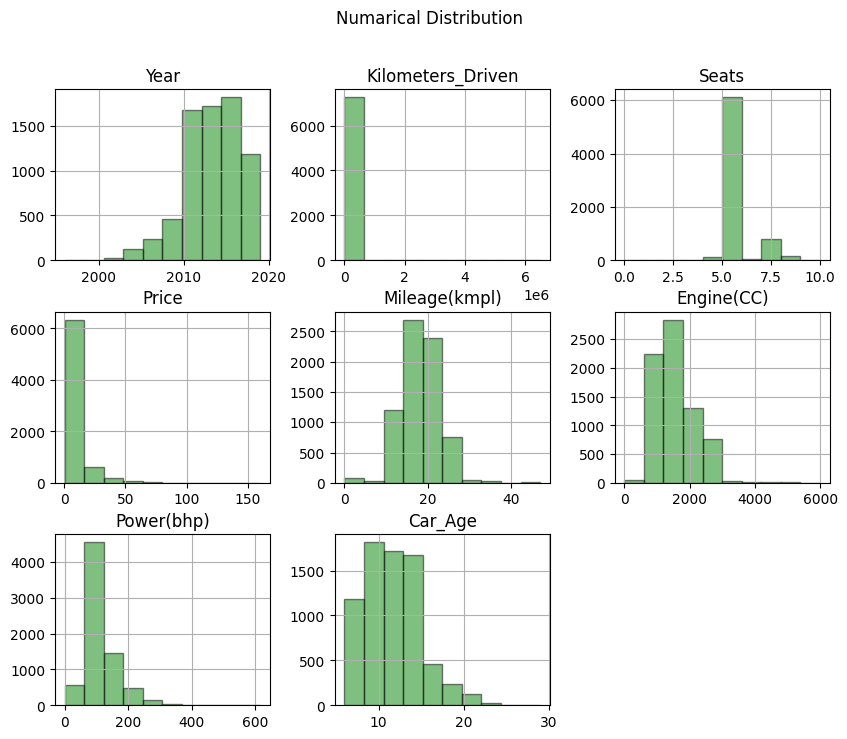

In [ ]:
plt.figure(figsize=(10,8))
df.hist(figsize=(10,8), bins=10,color='g' ,edgecolor='k', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.suptitle("Numarical Distribution")
plt.show()

- Year: Most cars were made between 2010 and 2020.
- Kilometers Driven: Most cars have driven under 2 million kilometers.
- Seats: 5-seater cars are the most common.
- Price: Most cars are priced below 50 units.
- Mileage (kmpl): Most cars give between 10 and 30 km per liter.
- Engine (CC): Most engines range between 1000 and 3000 CC.
- Power (bhp): Most cars have less than 200 bhp.
- Car Age: Most cars are between 5 and 15 years old.


Year


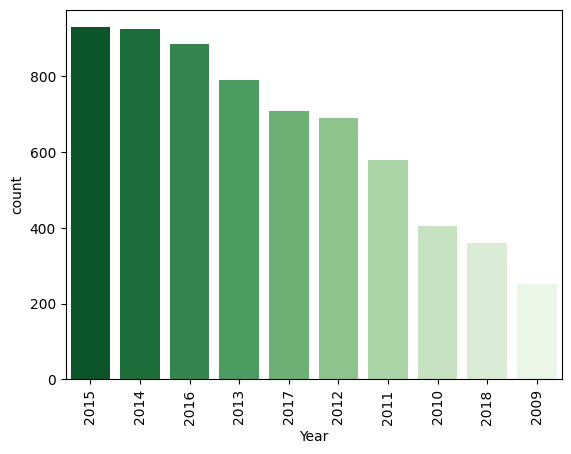

Kilometers_Driven


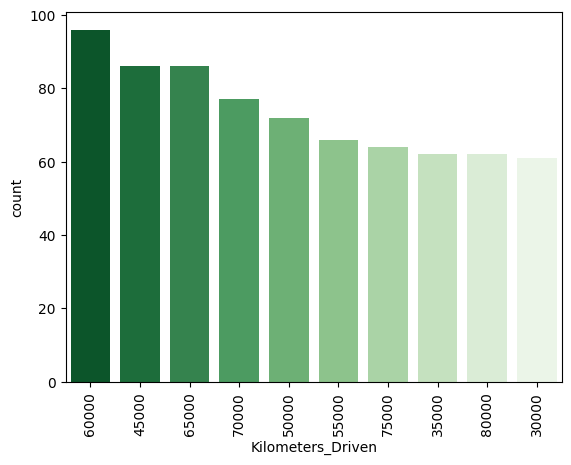

Seats


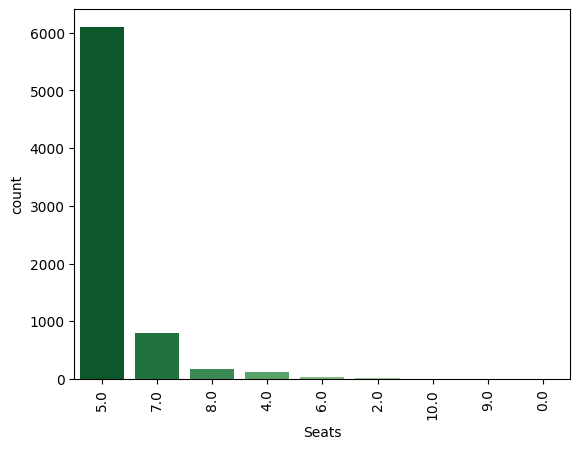

Price


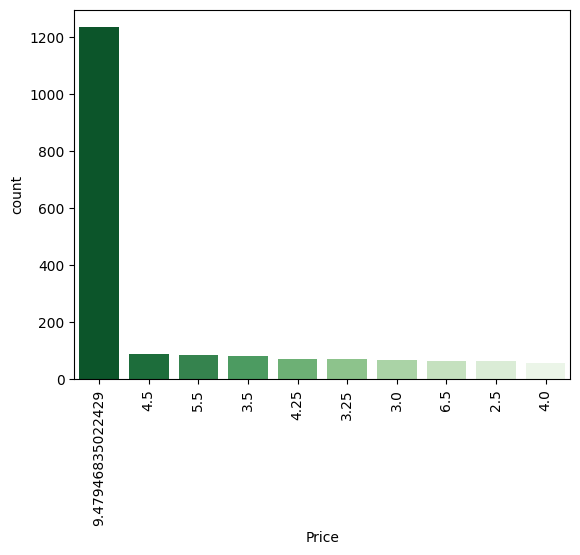

Mileage(kmpl)


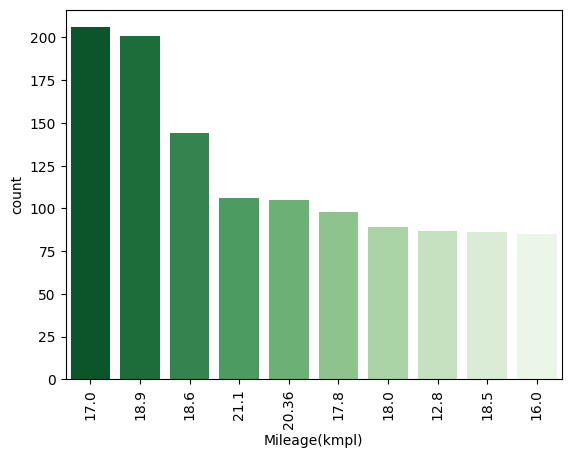

Engine(CC)


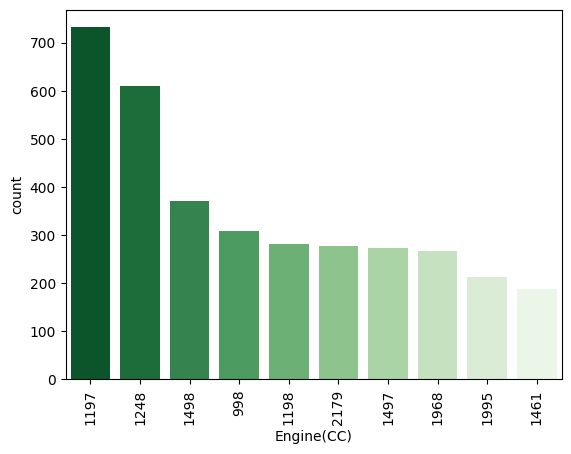

Power(bhp)


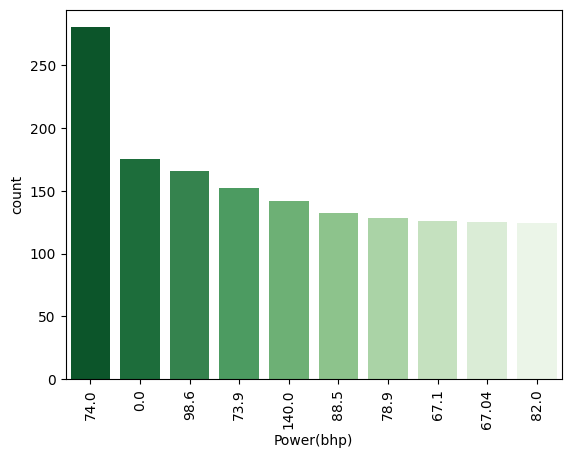

Car_Age


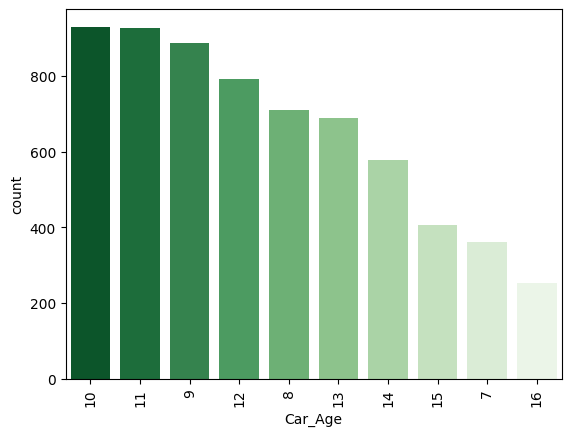

In [ ]:
for col in categorical:
    print(col)
    sns.countplot(data=df,x=col, order=df[col].value_counts().head(10).index,palette='Greens_r')
    plt.xticks(rotation=90)
    plt.show()
    

- Year chart shows a peak in occurrences in 2015, followed by a steady decline through 2018, with the lowest count in 2009.
- In Kilometers_Driven, Cars driven around 60,000 kilometers are the most common, while those with 30,000 kilometers show the lowest count.
- Most vehicles have 5 seats, making them the dominant choice by a wide margin compared to all other seating capacities.
- Most items are priced at 9.48, way more than any other price.
- Most vehicles have a mileage of 17.0 kmpl, while 16.0 kmpl is the least common.
- Cars with a 1197 CC engine are the most common, while those with 1461 CC are the least.
- Cars with 74.0 bhp are the most common, while other power values are much less frequent.
- Cars aged 10 and 11 years are the most common, while 16-year-old cars are the least.

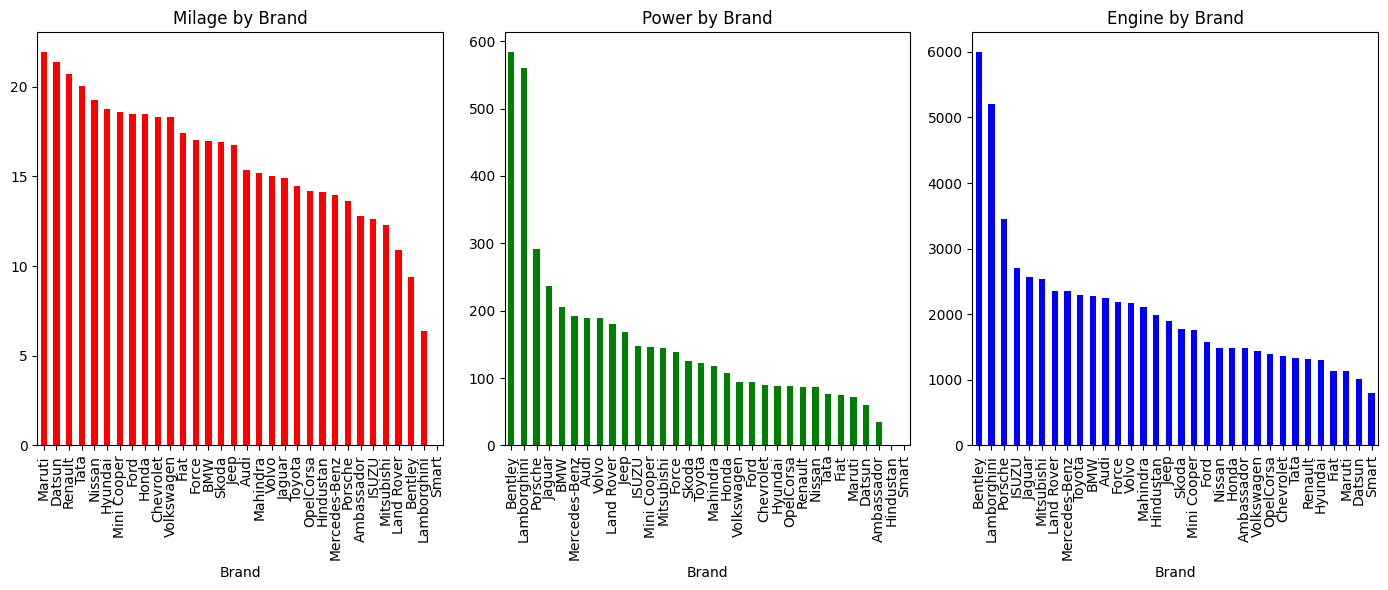

In [35]:
milage = df.groupby('Brand')['Mileage(kmpl)'].mean().sort_values(ascending=False)
power = df.groupby('Brand')['Power(bhp)'].mean().sort_values(ascending=False)
engine = df.groupby('Brand')['Engine(CC)'].mean().sort_values(ascending=False)
engine

fig,ax=plt.subplots(1,3,figsize=(14,6))
milage.plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Milage by Brand')

power.plot(kind='bar',ax=ax[1],color='g')
ax[1].set_title('Power by Brand')

engine.plot(kind='bar',ax=ax[2],color='b')
ax[2].set_title('Engine by Brand')

plt.tight_layout()
plt.show()


Mileage by Brand (Red Bars)
- Maruti offers the highest mileage among all brands.
- Datsun, Renault, Tata, and Nissan follow with relatively high mileage.
- Mileage gradually decreases across brands.
- Smart has the lowest mileage.

Power by Brand (Green Bars)
- Bentley delivers the highest power output.
- Followed by Lamborghini, Porsche, and Jaguar.
- Power decreases progressively across other brands.
- Smart again ranks lowest in terms of power.

 Engine Size by Brand (Blue Bars)
- Bentley has the largest engine size.
- Followed by Lamborghini, Porsche, and ISUZU.
- Engine size reduces steadily across brands.
- Smart has the smallest engine size.



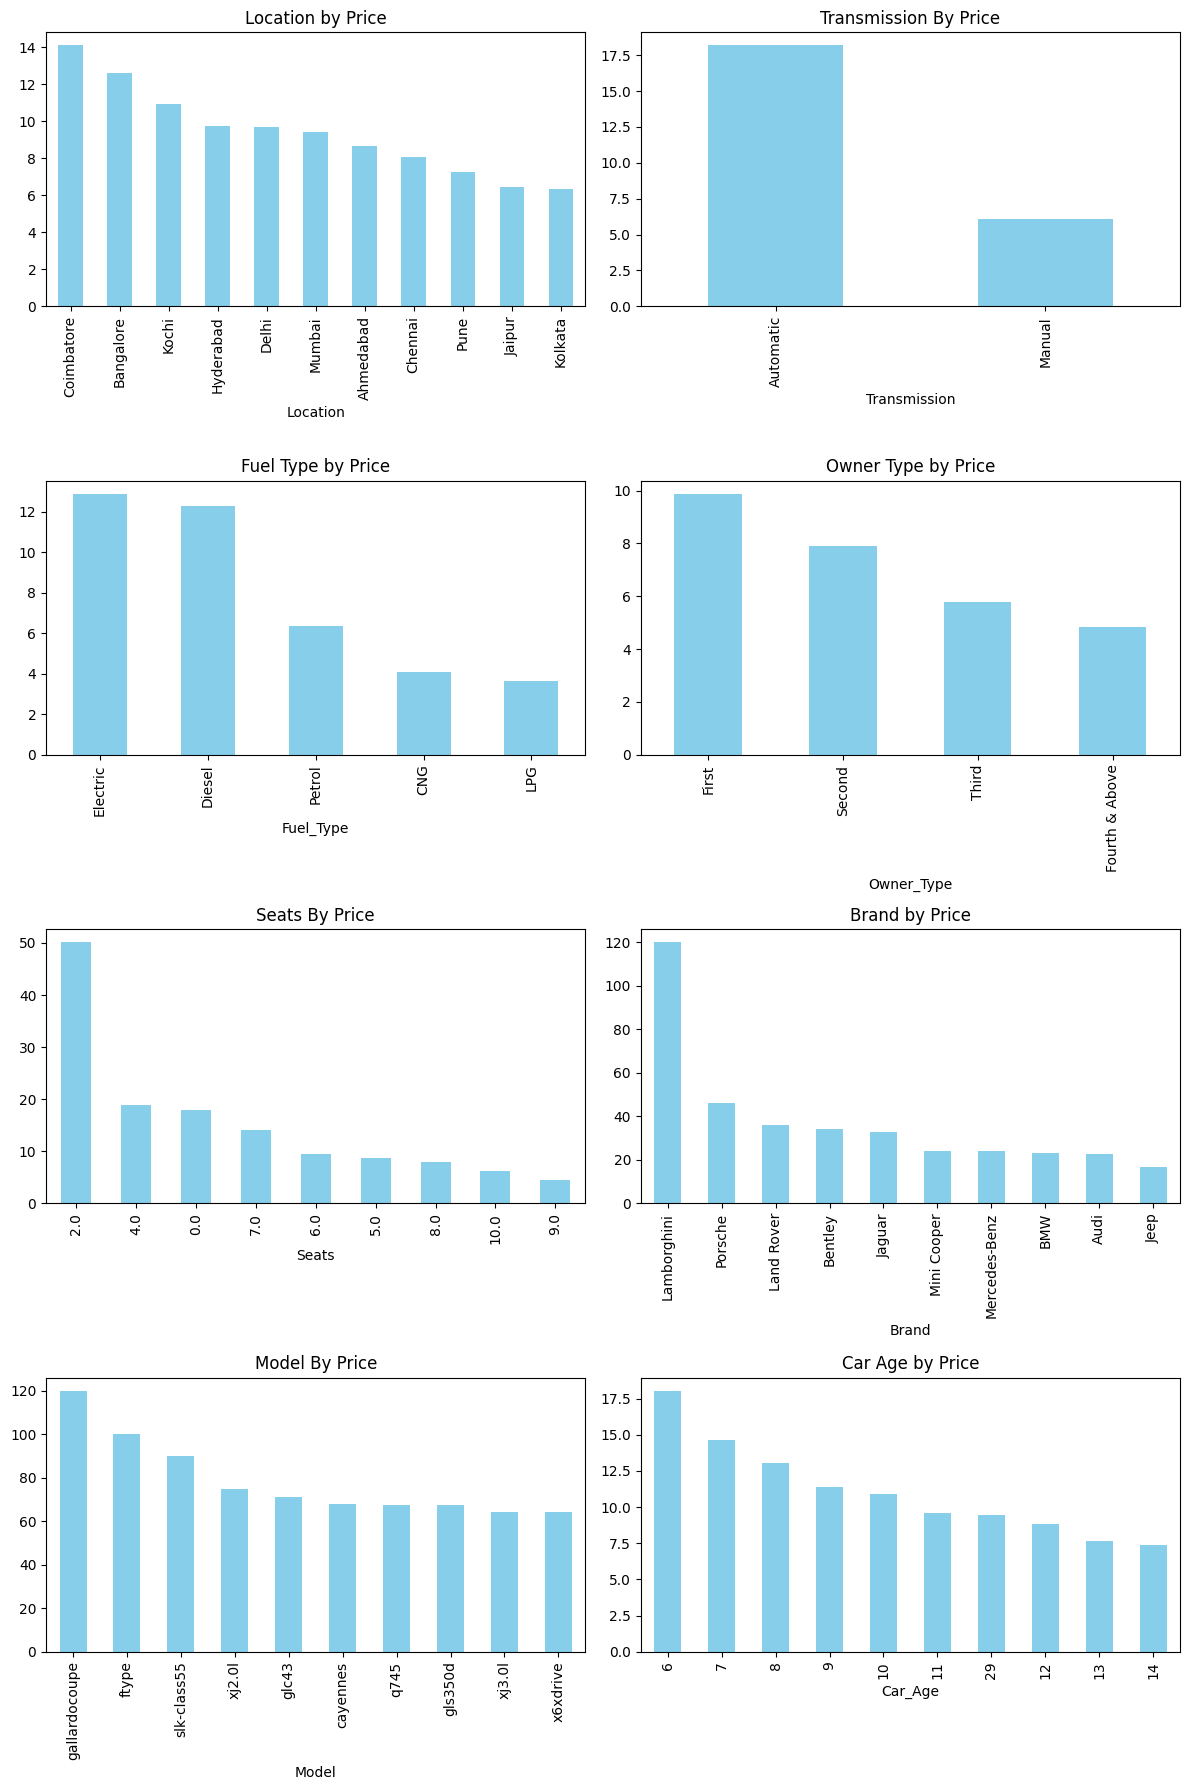

In [42]:
# Define features and titles for plotting
features =[
    ('Location','Location by Price'),
    ('Transmission','Transmission By Price'),
    ('Fuel_Type','Fuel Type by Price'),
    ('Owner_Type','Owner Type by Price'),
    ('Seats','Seats By Price'),
    ('Brand','Brand by Price'),
    ('Model','Model By Price'),
    ('Car_Age','Car Age by Price')
]

fig, ax=plt.subplots(4,2,figsize=(12,18))

for i, (feature,title) in enumerate(features):
    row,col = divmod(i,2)
    if feature in ['Brand','Model','Car_Age']:
        df.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=ax[row][col],color='skyblue')
    else:
        df.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(ax=ax[row][col],color='skyblue')
    ax[row][col].set_title(title)
plt.tight_layout()
plt.show()


City-wise Price Variation
- Car prices are highest in Coimbatore.
- Prices are lowest in Kolkata and Jaipur.

Transmission Type
- Automatic cars are priced higher than manual cars.

Fuel Type
- Diesel and Electric cars have the highest average prices.
- LPG cars are the least expensive.

Ownership
- First-owner cars command the highest prices.
- Second-owner cars are slightly lower.
- Interestingly, third-owner cars are priced lower than fourth and above owners.

Brand
- Lamborghini is the most expensive brand.
- Followed by other luxury brands like Porsche, Land Rover, and Bentley.

Model
- The Gallardocoupe model has the highest price.
- Other high-priced models include F-Type, SLK-Class 55, and XJ 20.1.

Seating Capacity
- 2-seater cars are the most expensive.
- Followed by 4-seater cars.
- Prices generally decrease with higher seating capacity.

Car Age
- Newer models (especially around 6 years old) tend to have higher prices.
- Older cars (10+ years) show a gradual decline in price.


In [38]:
corr= df[numerical].corr()

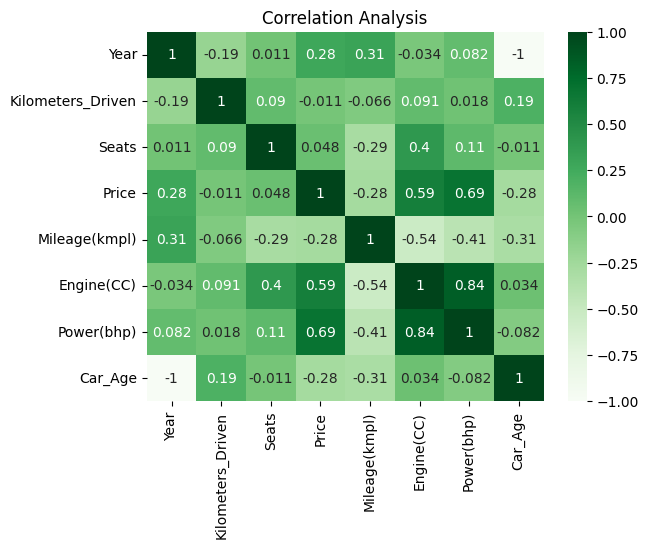

In [39]:
sns.heatmap(corr,annot=True,cmap='Greens')
plt.title('Correlation Analysis')
plt.show()

Cars with more powerful engines tend to cost more, while newer cars are usually younger in age.

#### **Conclusion**
Car prices are influenced by several factors, including location, transmission type (automatic or manual), fuel type, number of previous owners, brand and model, seating capacity, and age. Understanding these trends can help buyers make informed decisions that align with their preferences and budget.